In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement.csv')

In [6]:
print(df)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [10]:
df.shape

(100, 4)

In [ ]:
#steps 

#0 Preprocess + EDA + Feature Selection
#1 Extract input and output columns
#2 Scale the values
#3 Train test split
#4 Train the model
#5 Evaluate the model/model selection
#6 Deploy the model 

In [11]:
df = df.iloc[:,1:] #preprocessing - unnamed column to remove 

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
import matplotlib.pyplot as plt

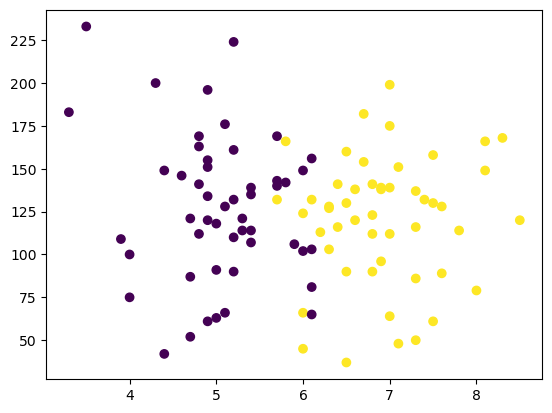

In [17]:
plt.scatter(df['cgpa'] , df['iq'], c = df['placement']) #yellow ka placement hogaya n blue ka nhi hua 

In [18]:
#step1    
#independent data cgpa & iq [X]
#dependent data placement
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
X       #2D tensor - matrix

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [21]:
y.shape   #1D tensor - vector

(100,)

In [26]:
#train - test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) #test_size -> test or train me kitna percent data jayega

In [27]:
X_train

,cgpa,iq
65,8.1,166.0
74,6.7,154.0
9,5.1,66.0
12,5.4,139.0
39,4.6,146.0
...,...,...
46,5.3,114.0
77,7.3,50.0
45,6.0,66.0
63,6.3,128.0


In [28]:
y_train

65    1
74    1
9     0
12    0
39    0
     ..
46    0
77    1
45    1
63    1
55    1
Name: placement, Length: 90, dtype: int64

In [29]:
X_test

,cgpa,iq
54,6.4,141.0
27,6.0,124.0
62,6.0,102.0
57,6.5,130.0
36,5.7,140.0
61,7.3,137.0
6,5.7,143.0
91,7.5,158.0
38,6.5,160.0
34,4.8,163.0


In [30]:
y_test

54    1
27    1
62    0
57    1
36    0
61    1
6     0
91    1
38    1
34    0
Name: placement, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_train

array([[ 1.82659635,  1.07619779],
       [ 0.62976255,  0.78416422],
       [-0.73804751, -1.3574153 ],
       [-0.48158312,  0.41912225],
       [-1.16548815,  0.58947517],
       [-0.82353564, -0.09193649],
       [ 1.74110822, -1.0410456 ],
       [ 0.88622693,  0.41912225],
       [ 1.3991557 , -0.79768429],
       [-0.90902377,  1.80628171],
       [-1.76390505, -0.31096167],
       [-0.90902377, -0.04326423],
       [ 0.2023219 , -0.21361715],
       [-0.82353564, -1.43042369],
       [ 0.8007388 ,  0.39478612],
       [-1.08000002, -1.69812113],
       [-0.9945119 ,  0.46779451],
       [ 1.82659635,  0.66248356],
       [ 0.28781003, -0.45697846],
       [-0.65255938, -0.77334816],
       [ 0.71525068,  0.02974416],
       [-1.67841692, -1.13839012],
       [ 0.28781003,  0.12708868],
       [ 0.88622693,  1.8792901 ],
       [ 1.22817945,  0.24876934],
       [-2.10585757,  2.70671855],
       [ 0.11683378, -0.99237334],
       [ 1.14269132, -0.14060876],
       [ 0.37329816,

In [35]:
X_test = scaler.fit_transform(X_test)

In [36]:
X_test

array([[ 0.21297395,  0.06846978],
       [-0.31946092, -0.90151874],
       [-0.31946092, -2.15679799],
       [ 0.34608266, -0.55916985],
       [-0.71878707,  0.01141163],
       [ 1.4109524 , -0.15976281],
       [-0.71878707,  0.18258607],
       [ 1.67716983,  1.03845829],
       [ 0.34608266,  1.15257459],
       [-1.91676553,  1.32374903]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()

In [45]:
#model training 
clf.fit(X_train,y_train)  

LogisticRegression()

In [46]:
'''
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
                   '''


"\nLogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)\n                   "

In [51]:
#model accuracy - naya data - chupaye hua student ka input values hai 
y_pred = clf.predict(X_test) 

In [52]:
y_test

54    1
27    1
62    0
57    1
36    0
61    1
6     0
91    1
38    1
34    0
Name: placement, dtype: int64

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred)

0.9

In [58]:
#plotting decision boundary - ml xtend
from mlxtend.plotting import plot_decision_regions

In [57]:
!pip install mlxtend

Unable to create process using 'C:\Users\shruti paul\anaconda3\anaconda\python.exe "C:\Users\shruti paul\anaconda3\anaconda\Scripts\pip-script.py" install mlxtend'


<Axes: >

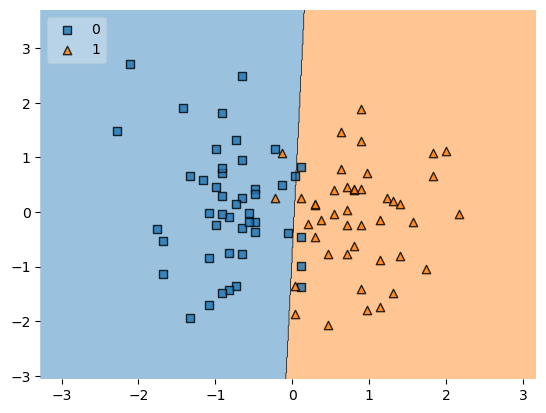

In [59]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)    #model

In [60]:
import pickle #it converts object into file and can be used in any environment 

In [61]:
pickle.dump(clf,open('model.pkl','wb'))